# Assignment 1

### Folkert Stijnman - 10475206
### Introduction to Computational Science


<img style="float: left;" src="problem1.png">

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [2]:
def sir(y, t, beta, gamma):
    """TO DO: DESCRIBE FUNCTION """

    S, I, R = y
    
    ds_dt = - beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    
    return([ds_dt, di_dt, dr_dt])

Basic Reproductive Rate = 1.0


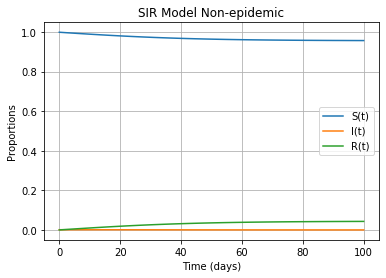

In [139]:
y = [0.999, 0.001, 0]
beta = 365/365
gamma = 7/7
print("Basic Reproductive Rate = {0}".format(beta / gamma))


t = np.linspace(0, 100, 100)

solution = scipy.integrate.odeint(sir, y, t, args=(beta,gamma))

plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR Model Non-epidemic")
plt.savefig("non-epidemic_simple.png", dpi=300)
plt.show()

Basic Reproductive Rate = 10.0


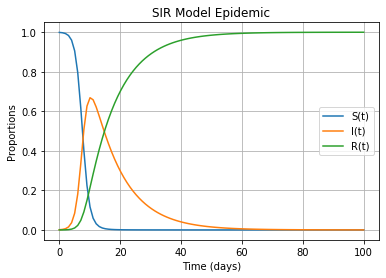

In [143]:
y = [0.999, 0.001, 0]
beta = 1
gamma = 1/10
print("Basic Reproductive Rate = {0}".format(beta / gamma))

t = np.linspace(0, 100, 100)

solution = scipy.integrate.odeint(sir, y, t, args=(beta,gamma))

plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Proportions")
plt.title("SIR Model Epidemic")
plt.savefig("epidemic_simple.png", dpi=300)
plt.show()

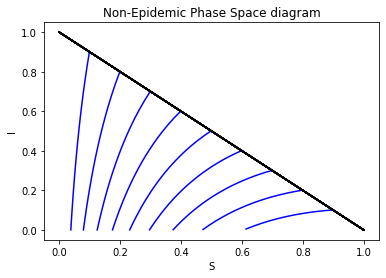

In [144]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 1
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("Non-Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("non-epidemic.png", dpi=300)

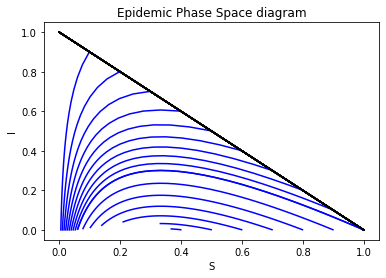

In [145]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 3
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic.png", dpi=300)

In [146]:
from scipy.optimize import least_squares

t = np.linspace(0, 15, 15)
I_data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

def sir_integrate(variables, t, data, y):
    """TO DO: DESCRIBE FUNCTION """
    return data - scipy.integrate.odeint(sir, y, t, args=(variables[0],variables[1]))[:,1]

variables = [0, 0]
start_sit = [762, 1, 0]
res_lsq = least_squares(sir_integrate, variables, args=(t, I_data, start_sit))
variables_lsq = res_lsq.x

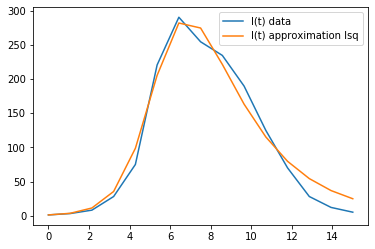

Found beta = 0.0020368392102385856 and gamma = 0.41776934364074053


In [147]:
solution = scipy.integrate.odeint(sir, start_sit, t, args=(variables_lsq[0],variables_lsq[1]))

t = np.linspace(0, 15, 15)
I_data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

plt.plot(t, I_data, label="I(t) data")
plt.plot(t, solution[:, 1], label="I(t) approximation lsq")

# TO DO: FIX LEGEND
# plt.legend([r"$\beta = {0}$".format(variables_lsq[0]), r"$\gamma = {0}$".format(variables_lsq[1])])

plt.legend(loc=1)
plt.savefig("boardingfit.png", dpi=300)
plt.show()
print("Found beta = {0} and gamma = {1}".format(variables_lsq[0], variables_lsq[1]))

<img style="float: left;" src="problem2.png">

0.4761904761904762


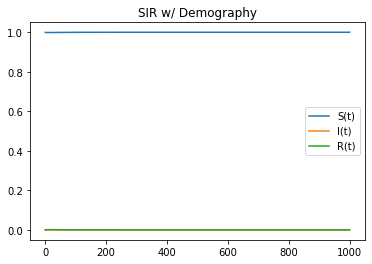

In [115]:
def sir_demography(y, t, mu, beta, gamma):
    S, I, R = y
    
    ds_dt = mu - (beta * S * I) - (mu * S)
    di_dt = (beta * S * I) - (gamma * I) - (mu * I)
    dr_dt = (gamma * I) - (mu * R)
    
    return([ds_dt, di_dt, dr_dt])

t = np.linspace(0, 1000, 1000)

beta = 1/6
gamma = 1/3
mu = 1/(60)
R_0 = beta / (gamma + mu)
print(R_0)
S0 = 0.999
I0 = 0.001
R0 = 0

y = [S0, I0, R0]


solution = scipy.integrate.odeint(sir_demography, y, t, args=(mu, beta, gamma))
plt.plot(t, solution[:,0], label="S(t)")
plt.plot(t, solution[:,1], label="I(t)")
plt.plot(t, solution[:,2], label="R(t)")

# TO DO: FIX LEGEND

plt.title("SIR w/ Demography")
plt.legend()
plt.show()

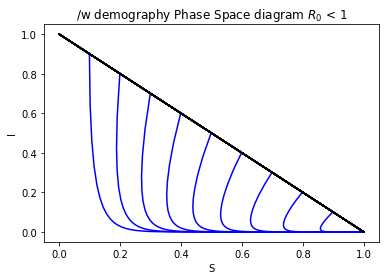

In [116]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

t = np.linspace(0, 1000, 1000)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir_demography, [S[j], I[i], R_0], t, args=(mu, beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.title("/w demography Phase Space diagram $R_0$ < 1")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic3.png", dpi=300)

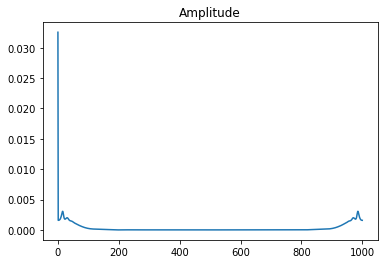

In [103]:
fourier = np.fft.fft(solution[:,1])
plt.plot(t, abs(fourier/fourier.size))
plt.title("Amplitude")
plt.show()

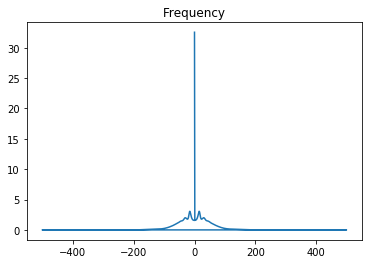

In [104]:
fourier = np.fft.fft(solution[:,1])
freqs = np.fft.fftfreq(len(solution[:,1])) * 1000

plt.plot(freqs, np.abs(fourier))
plt.title("Frequency")
plt.show()

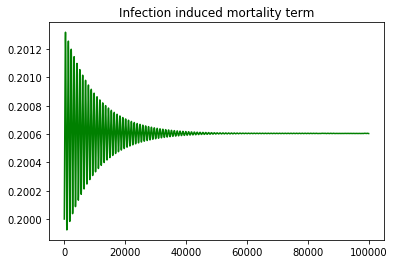

In [107]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

rho=0.5
nu=mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=1e5
N0=1
X0=0.2
Y0=1e-4
Z0=N0-X0-Y0
INPUT = (X0, Y0, Z0)

def diff_eqs(INP,t):  
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP    
    Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
    Y[1] = beta * V[0] * V[1] - (gamma + mu) * V[1]/(1-rho)
    Y[2] = gamma * V[1] - mu * V[2]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Ploting
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Infection induced mortality term')
pl.show()